<div style=" background: #d89cf6;
             padding-top: 40px;
             padding-right: 20px;
             padding-bottom: 40px;
             height: 250px;
             width: 100%;
             padding-left: 60px;">
             <a><img src = "https://userscontent2.emaze.com/images/554d3234-e63d-40ea-9751-e78747ed578f/f0db0aee6e32e78026b142a59884d518.png" width=400></a>
 </div>

# EXPLORATORY DATA ANALYSIS   

EDA is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. My objective for this project is to understand data and how it is distributed. I will analyze this data in a very simple yet informative way using Data Visualization.<br> <b><i>"A picture speaks a thousand words"</i></b>.<br> Lets delve into data and grind some information !!!

# Data Description

It was generated by a scrape of [vgchartz.com](https://www.vgchartz.com/gamedb/) <br>
Link for [Dataset](https://www.kaggle.com/vprokopev/targetencodingsdata?select=vgsales1.csv) <br>
Number of recordes - 16598 <br>
Number of fields - 11
## Fields
Name - The games name<br>
Platform - Platform on which it was released<br>
Year - Year in which it was released<br>
Genre - Genre of the game<br>
Publisher - Publisher of the game<br>
NA_Sales - Sales in North America (in millions)<br>
EU_Sales - Sales in Europe (in millions)<br>
JP_Sales - Sales in Japan (in millions)<br>
Other_Sales -Sales in rest of the world (in millions)<br>
Global_Sales - Overall sales (in millions)<br>


# Used Libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
sns.set_context("talk")
%matplotlib inline

# Data Loading

In [58]:
df = pd.read_csv('../input/targetencodingsdata/vgsales1.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Data Cleaning

Remove records with missing values/NaN from Year column.<br>
Also remove 4 records in which 3 records are from 2017 and 1 record is from 2020.<br>
I will analyize only the data which is in the year range from 1980 to 2016

In [59]:
df.dropna(subset = ["Year"], inplace=True)
df = df[df.Year != 2017]
df = df[df.Year != 2020]
df.shape

(16323, 11)

# Years With Maximum number Of Games Released

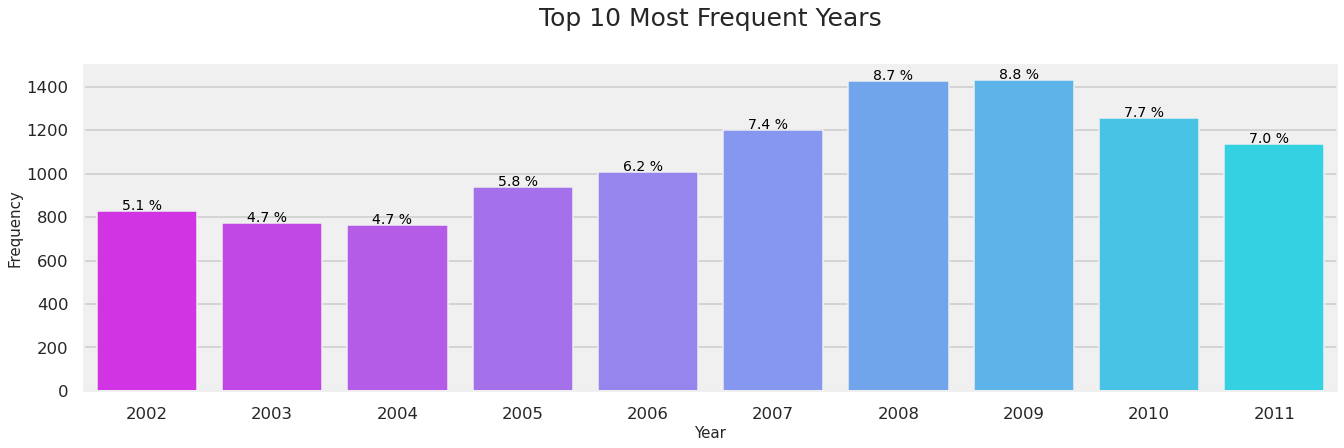

In [60]:
df['Year'] = df['Year'].astype('int')
df_year = df['Year']
df_year = pd.DataFrame(df_year.value_counts())
df_year = df_year.sort_values('Year' , ascending=False).reset_index()
df_year.rename(columns = {'index':'Year','Year':'Frequency'}, inplace=True)
df_year['perc']= (df_year['Frequency']/df_year['Frequency'].sum())*100
top = df_year.head(10)
bottom = df_year.tail(10)
fig = plt.figure(figsize=(20,6))
ax=sns.barplot(x='Year', y='Frequency', data=top, palette='cool_r')
tt='Top 10 Most Frequent Years'
ax.set_title(tt, fontsize=25,y=1.1)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_xlabel('Year',fontsize=15)
ax.axes.get_xaxis().set_visible(True)
l = top.sort_values('Year')['perc'].tolist()
j=0
for i in ax.patches:
    l[j] = round(l[j],1)
    ax.text(i.get_x() + 0.2, i.get_height() + 5, str(l[j]) + " %", fontsize = 14, color='black')
    j=j+1


Increasing trend is seen between 2004-2008.<br>
2008 and 2009 where the years with maximum number of game release.

# Global Sales

In [61]:
df_sale=df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
df_sale.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16323.000000,16323.000000,16323.000000,16323.000000,16323.000000
mean,0.265463,0.147591,0.078677,0.048336,0.540343
std,0.821684,0.508823,0.311593,0.189907,1.565906
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.480000
max,41.490000,29.020000,10.220000,10.570000,82.740000


In [62]:
df_sale=df_sale.sum(axis=0)
df_sale= pd.DataFrame(df_sale)
df_sale.rename(columns = {0:'Total'}, index={'NA_Sales':'North America Sales',
                                             'EU_Sales':'Europe Sales',
                                             'JP_Sales':'Japan Sales ',
                                             'Other_Sales':'Other Sales'}, inplace=True)
df_sale.drop(['Global_Sales'], inplace = True) 
df_sale

,Total
North America Sales,4333.16
Europe Sales,2409.12
Japan Sales,1284.25
Other Sales,788.99


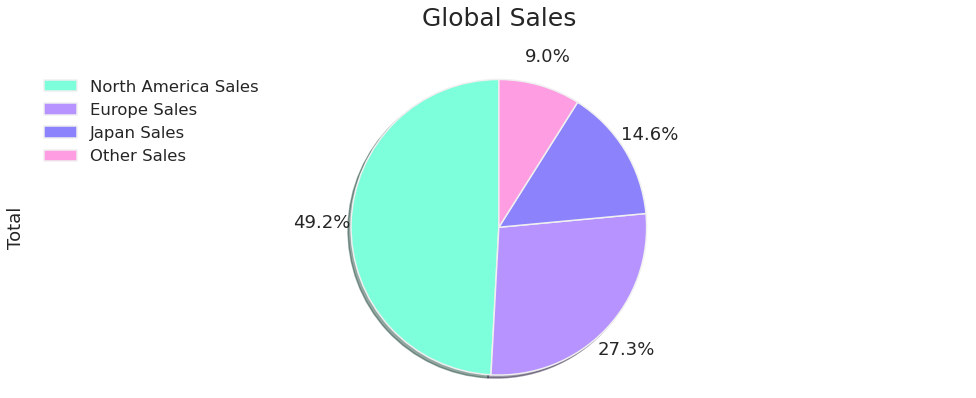

In [63]:
colors_list = ['#7effdb','#b693fe', '#8c82fc', '#ff9de2']
mpl.rcParams['font.size'] = 18.0
df_sale['Total'].plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%', 
            startangle=90,  
            shadow=True,       
            labels=None,    
            pctdistance=1.2, 
            colors=colors_list,
            )

plt.title('Global Sales',y=1.1,fontsize=25) 
plt.axis('equal') 
plt.legend(labels=df_sale.index, loc='upper left') 
plt.show()

# Most Frequent Games And Platforms

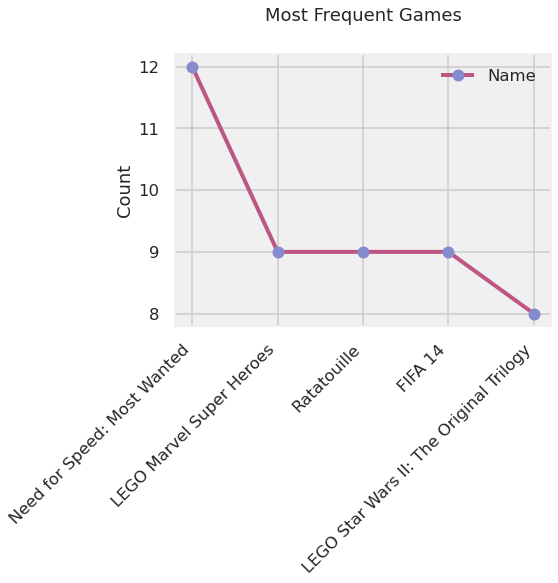

In [64]:
df_game = pd.DataFrame(df['Name'].value_counts().head())
df_plat = pd.DataFrame(df['Platform'].value_counts().head())
ax=df_game.plot( kind='line', figsize=(6,5), marker='o', markerfacecolor='#848ccf', markersize=12, color='#be5683', linewidth=4)
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.title('Most Frequent Games',y=1.1)
plt.ylabel('Count')
ax.axes.get_yaxis().set_visible(True)

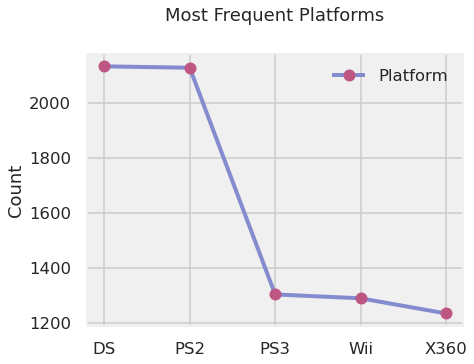

In [65]:
ax=df_plat.plot( kind='line', figsize=(6,5), marker='o', markerfacecolor='#be5683', markersize=12, color='#848ccf', linewidth=4)
plt.legend()
plt.title('Most Frequent Platforms',y=1.1)
plt.ylabel('Count')
ax.axes.get_yaxis().set_visible(True)

This visuals display the most common Games and Platforms Worldwide.

# Genre Frequncy Distribution
A video game genre is a classification assigned to a video game based on its gameplay (type of interaction) and visual or narrative features.

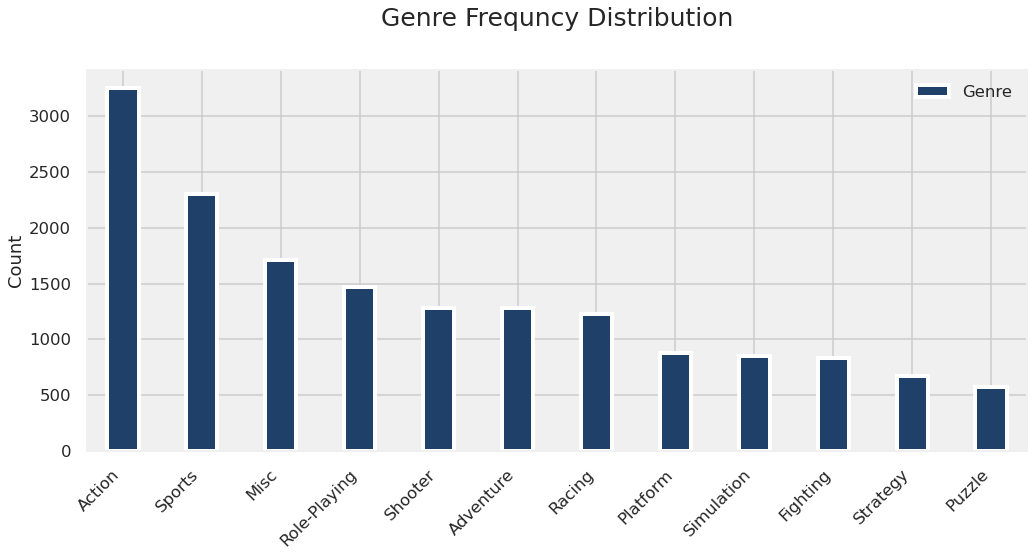

In [66]:
df_gen = pd.DataFrame(df['Genre'].value_counts())
df_gen.plot(kind='bar',
            figsize=(15,7),
            width = 0.4,
            linewidth = 4,
            edgecolor = 'white',
            color = '#1f4068')
plt.xticks(rotation=45, ha='right')
plt.title('Genre Frequncy Distribution',fontsize=25,y=1.1)
plt.ylabel('Count')
ax.axes.get_yaxis().set_visible(True)

Action and Sports are the most common genre worldwide.<br>
Shooter, Adventure and Racing have almost similar type of attention.<br>
Strategy and Puzzle games are less common although it can improve your brains 🧠 but gamers are more into entertainment.

# Publisher Frequency Distribution

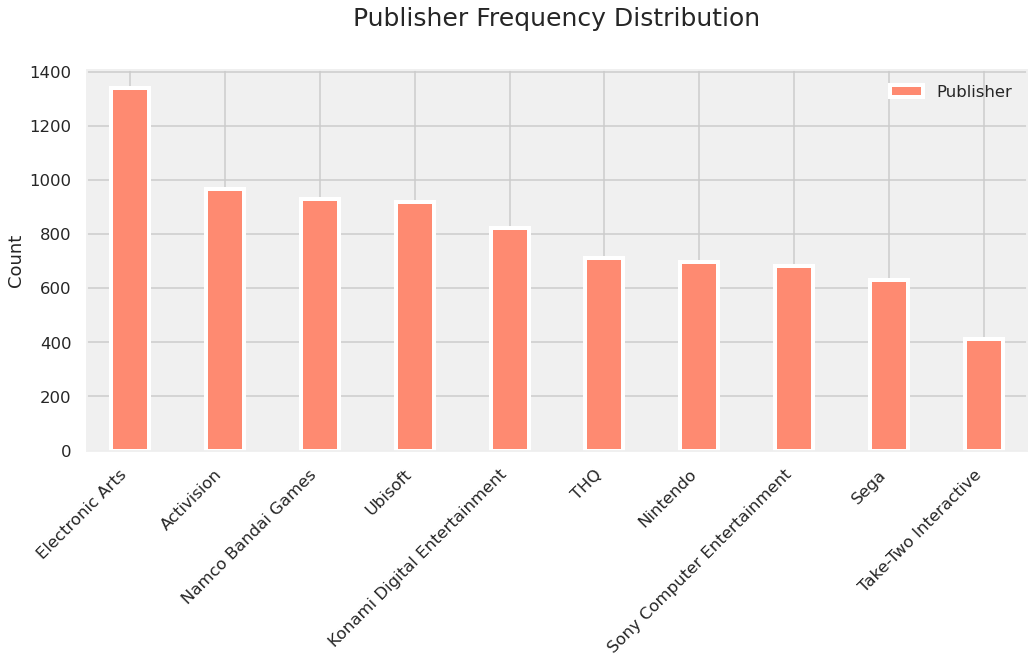

In [67]:
df_pub = pd.DataFrame(df['Publisher'].value_counts())
df_pub = df_pub.head(10)
df_pub.plot(kind='bar',
            figsize=(15,7),
            width = 0.4,
            linewidth = 4,
            edgecolor = 'white',
            color = '#fe8a71')
plt.xticks(rotation=45, ha='right')
plt.title('Publisher Frequency Distribution',y=1.1,fontsize=25)
plt.ylabel('Count')
ax.axes.get_yaxis().set_visible(True)

# Libraries Required For Interactive Outputs

In [68]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [69]:
import ipywidgets as widgets
from ipywidgets import HBox, VBox
from IPython.display import display

<div style="background:#d89cf6;height:130px;"><br><h3 style="color:white;text-align: center;margin-right:10px;margin-left:10px;"> NOTE - IPYWidgets doesn't load in Github notebooks, So I'm going to upload screenshots of plots. If you want to interact with notebook, then you need to download the notebook. Happy Learning 😃</h3></div>

  # Top 10 Games With Highest Sales 

In [70]:
@widgets.interact_manual(
    Zone = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])
def plot(Zone = 'Global_Sales',grid=True):
    df_top = df.sort_values(Zone)
    df_top = df_top[['Name',Zone]].set_index('Name')
    df_top = df_top.tail(10)
    ax = df_top.plot(kind='barh', 
          figsize = (10, 6), 
          width = 0.45,
          linewidth=3, 
          edgecolor='white',
          color='#848ccf')
    label = [ Zone + ' (in millions)']
    tt = "Top 10 Games with Highest Sales - " + Zone[:-6]
    ax.set_title(tt, fontsize=25,y=1.1)
    plt.legend(label,fontsize = 16)
    ax.set_yticklabels(df_top.index.tolist(),fontsize=22)
    ax.axes.get_yaxis().set_visible(True)

interactive(children=(Dropdown(description='Zone', index=4, options=('NA_Sales', 'EU_Sales', 'JP_Sales', 'Othe…

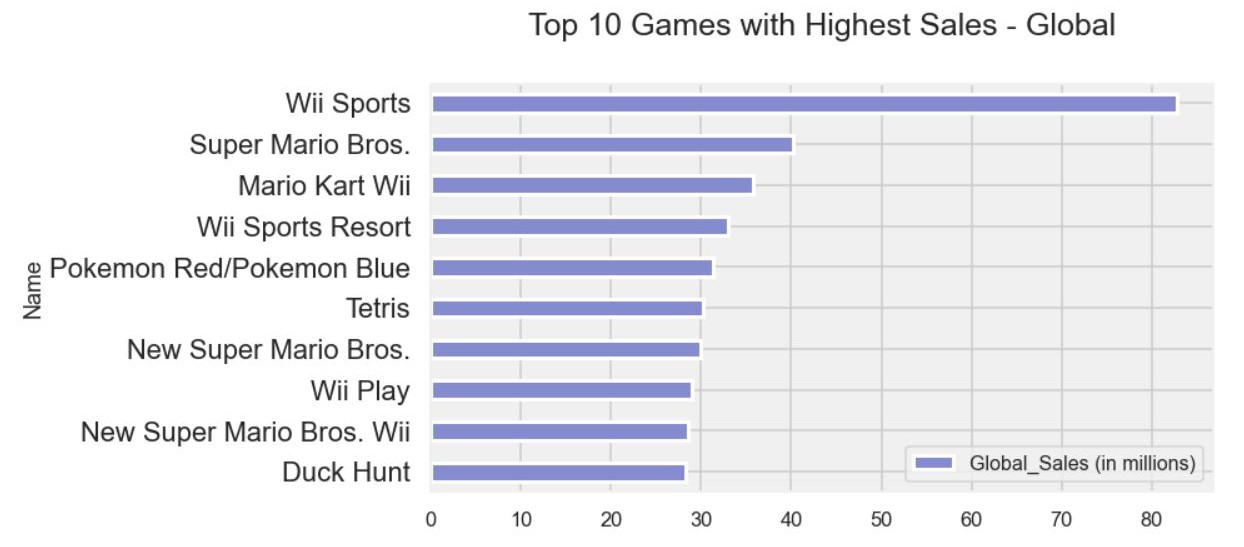

As you can see globally Wii Sports have extremely high sales ( around 82 millions ).<br>
It's because North America and Europe which covers 76% of global sales have large markets for Wii Sports.<br> 
In Japan Pokemon games have high demand along with mario games.<br>

# Number Of Sales Per Platform

In [71]:
df_platsale = df[['Platform','NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
df_platsale = df_platsale.groupby('Platform')['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'].sum()
@widgets.interact_manual(
    Zone = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])
def plot(Zone = 'Global_Sales'):
    ax = df_platsale[Zone].plot(color = '#6a197d',
                                      linewidth = 3,
                                      linestyle='--')
    ax = df_platsale[Zone].plot(kind='bar',
                                 figsize = (20,8),
                                 width = 0.2,
                                 color = '#ffa5b0',
                                 ax=ax)
    plt.xticks(rotation=45, ha='right',fontsize=20)
    tt = 'Number Of Sales Per Platform (in million) - ' + Zone[:-6]
    plt.title(tt,fontsize=30,y=1.1)
    ax.axes.get_yaxis().set_visible(True)

interactive(children=(Dropdown(description='Zone', index=4, options=('NA_Sales', 'EU_Sales', 'JP_Sales', 'Othe…

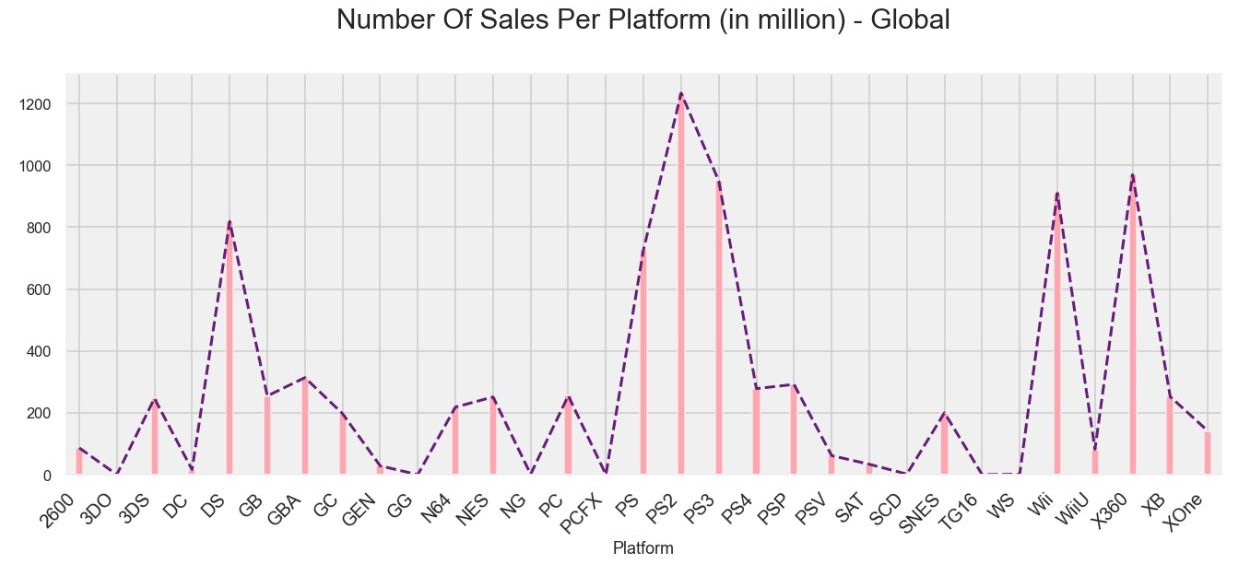

<h2>Top 5 Platforms</h2><br>
<b>North America</b>- X360, PS2, Wii, PS3, Nintendo DS<br>
<b>Europe</b> - PS3, PS2, X360, Wii, Nintendo DS<br>
<b>Japan</b> - Nintendo DS, PS, PS2, SNES, NES<br>
<b>Rest Of The World</b> - PS2, PS3, X360, Wii, Nintendo DS<br>
<b>Global</b> - PS2, X360, PS3, Wii, Nintendo DS<br>

# Sales According To Genre

In [72]:
df_gsale = df[['Genre','NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
df_gsale = df_gsale.groupby('Genre')['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'].sum()
@widgets.interact_manual(
    Zone = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])
def plot(Zone = 'Global_Sales'):
    ax = df_gsale[Zone].plot(kind='bar',
                                 figsize = (13,7),
                                 width = 0.4,
                                 linewidth = 4,
                                 edgecolor='white',
                                 color = '#32e0c4')
    plt.xticks(rotation=45, ha='right',fontsize=20)
    tt = 'Number Of Sales Per Genre (in million) - ' + Zone[:-6]
    plt.title(tt,fontsize=22,y=1.1)
    ax.axes.get_yaxis().set_visible(True)

interactive(children=(Dropdown(description='Zone', index=4, options=('NA_Sales', 'EU_Sales', 'JP_Sales', 'Othe…

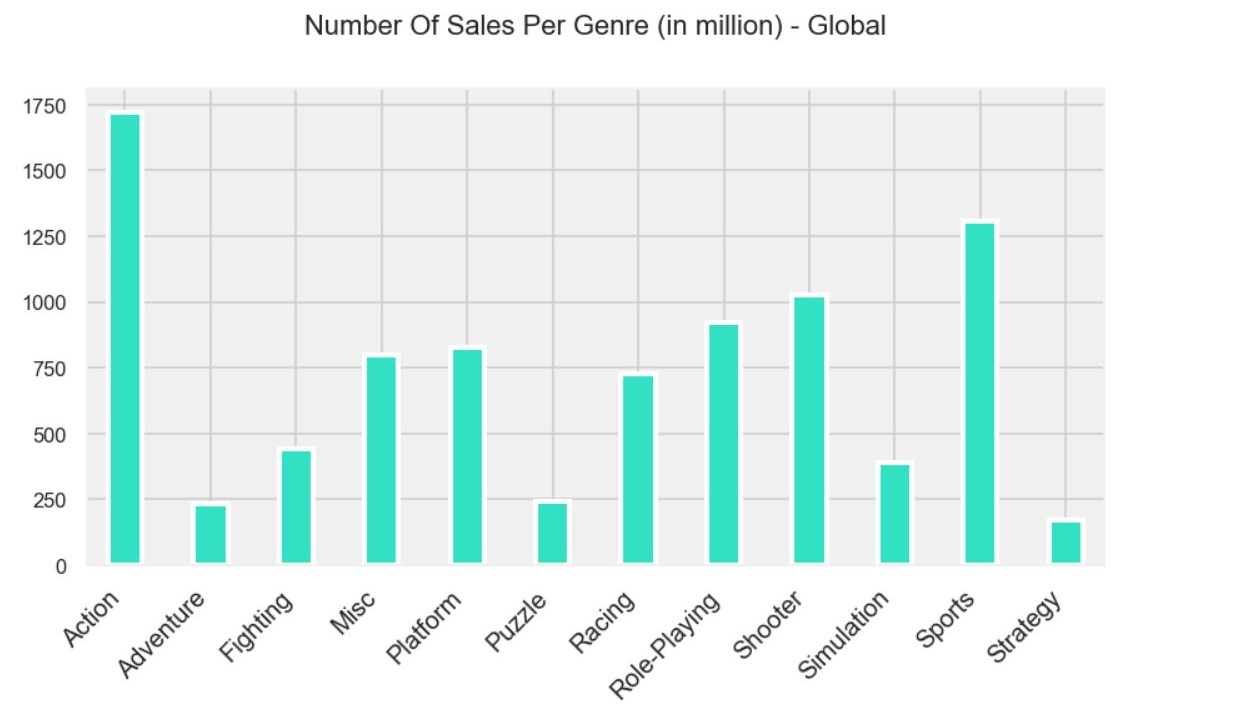

<h2>Top 5 Genre</h2>
<b>North America</b> - Action, Sports, Shooter, Platform, Misc<br>
<b>Europe</b> - Action, Sports, Shooter, Racing, Misc<br>
<b>Japan</b> - Role Playing, Action, Sports, Platform, Misc<br>
<b>Rest Of The World</b> - Action, Sports, Shooter, Racing, Misc<br>
<b>Global</b> - Action, Sports, Shooter, Role Playing, Platform<br>
<br>
Action and Sports games are the most common games with high market sales. In Japan, Role Playing games are with huge demand.

# Top 5 Games With Highest Sales (Platform and Genre Wise )

In [73]:
@widgets.interact_manual(
    Zone = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
    Platform = list(df.Platform.unique()),
    Genre = list(df.Genre.unique()))
def plot(Zone = 'Global_Sales',Platform = 'X360', Genre='Action'):
    df_game = df[['Name','Platform','Genre','NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
    df_game = df_game[df_game['Platform']==Platform]
    df_game = df_game[df_game['Genre']==Genre]
    df_game = df_game.groupby('Name')['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'].sum()
    df_game = df_game.sort_values(Zone)
    df_game = df_game[Zone].tail()
    ax = df_game.plot(kind='barh', 
          figsize = (12, 4), 
          width = 0.45,
          linewidth=3, 
          edgecolor='white',
          color='#be9fe1')
    label = [ Zone + ' (in millions)']
    tt = "Top 5 Games With Highest Sales ( "+Platform+" ) ( "+Genre+" ) - "  + Zone[:-6]
    ax.set_title(tt, fontsize=25,y=1.1)
    plt.legend(label,fontsize = 16)
    ax.set_yticklabels(df_game.index.tolist(),fontsize=22)
    ax.axes.get_yaxis().set_visible(True)

interactive(children=(Dropdown(description='Zone', index=4, options=('NA_Sales', 'EU_Sales', 'JP_Sales', 'Othe…

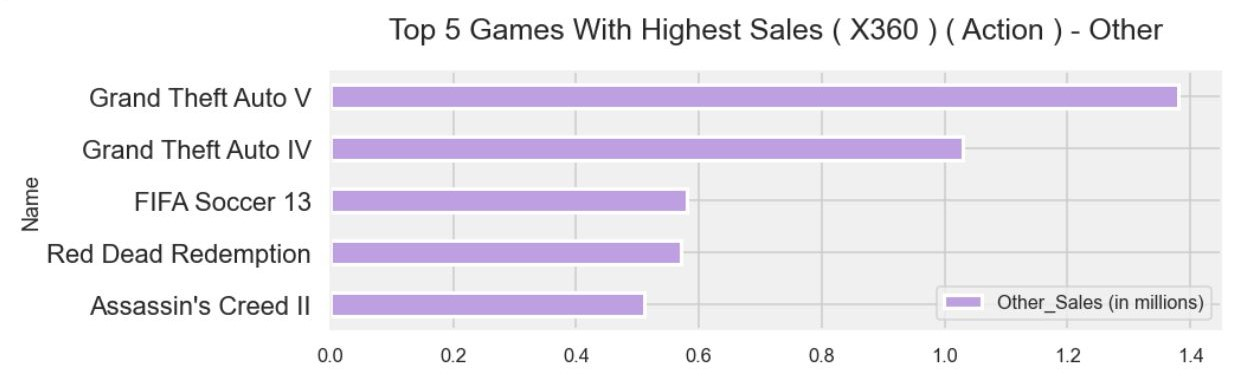

# Sales According To Publisher

In [74]:
@widgets.interact_manual(
    Zone = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])
def plot(Zone = 'Global_Sales'):
    df_pub = df[['Publisher','NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
    df_pub = df_pub.groupby('Publisher')['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'].sum()
    df_pub = df_pub.sort_values(Zone)
    df_pub = df_pub.tail(15)
    ax = df_pub[Zone].plot(kind='bar',
                                 figsize = (15,7),
                                 width = 0.4,
                                 linewidth = 4,
                                 edgecolor='white',
                                 color = '#ff7272')
    plt.xticks(rotation=45, ha='right',fontsize=20)
    tt = 'Number Of Sales Per Publisher (in million) - ' + Zone[:-6]
    plt.title(tt,fontsize=30,y=1.1)
    ax.axes.get_yaxis().set_visible(True)

interactive(children=(Dropdown(description='Zone', index=4, options=('NA_Sales', 'EU_Sales', 'JP_Sales', 'Othe…

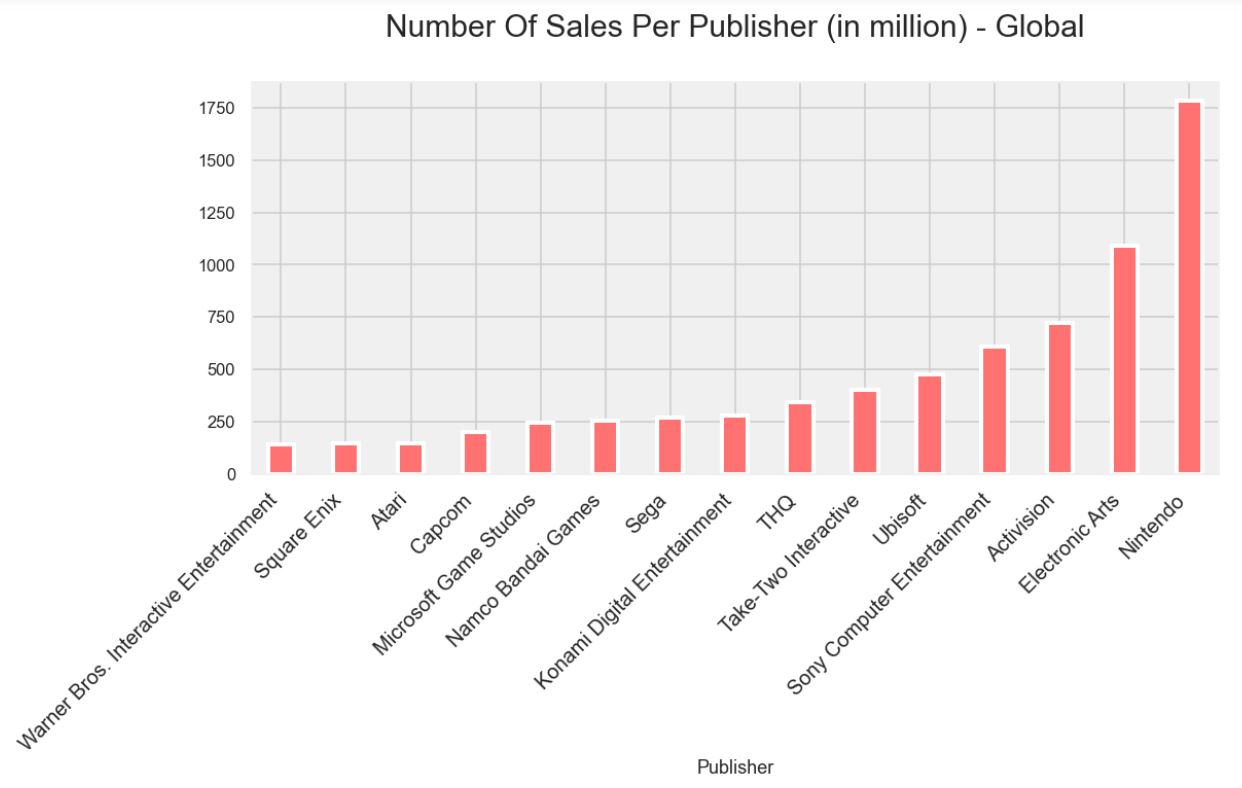

# Number Of Sales By Year

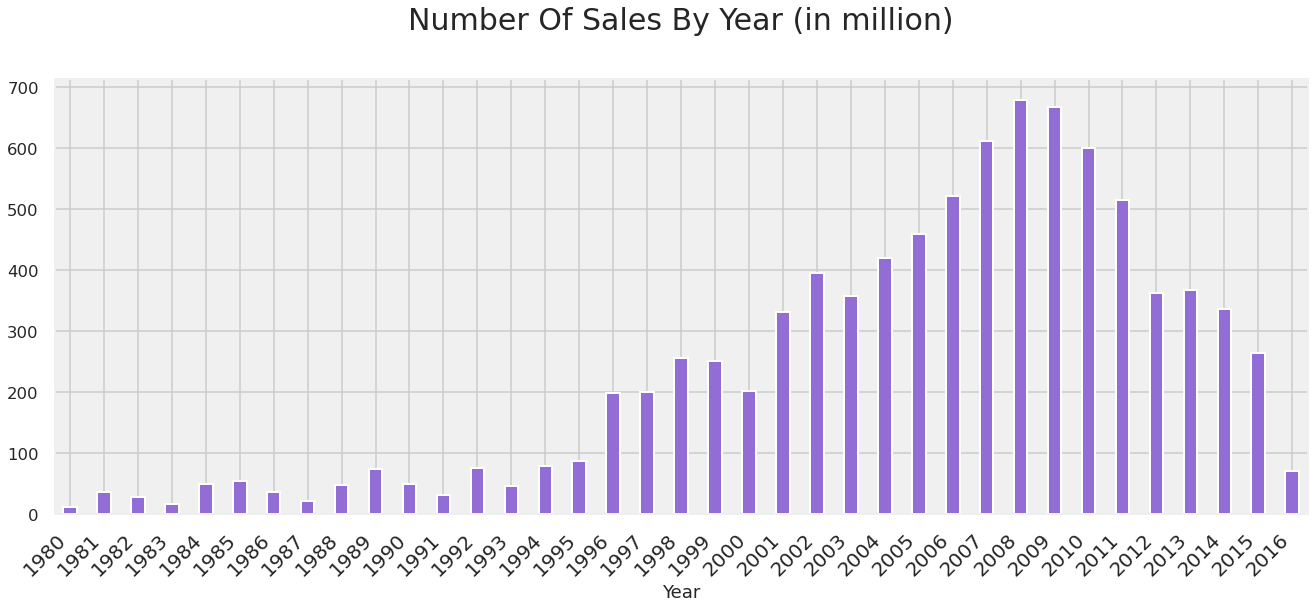

In [75]:
df_global = pd.DataFrame(df.groupby('Year')['Global_Sales'].sum())
ax=df_global.plot(kind='bar',
                    figsize = (20,8),
                    width = 0.4,
                    color = '#916dd5',
                    linewidth=2,
                    edgecolor= 'white')
plt.xticks(rotation=45, ha='right',fontsize=20)
ax.get_legend().remove()
tt = 'Number Of Sales By Year (in million)'
plt.title(tt,fontsize=30,y=1.1)
ax.axes.get_yaxis().set_visible(True)

2008 and 2009 have high sales beacause highest number of games where released in 2008-2009.<br>
<b>Number of Games Realeased ∝ Sale</b>

<div style=" background: #d89cf6;
             padding-right: 20px;
             padding-bottom: 40px;
             height: 160px;
             width: 100%;
             padding-left: 60px;">
             <h2 style="color:white;text-align: center;"><br><br>For now this is the end of the analysis 🤍<br> Please do star 
⭐ if you like it and let me know in the comments if there is anything wrong or how to improve it.</h2><br>
 </div>